# <font color='gold'> <center> LAB 2

## <font color='gold'> PART A : Prerequisite for kNN implementation.(Q1. – Q.12 may help you to implement kNN on your own ) </font>

### <font color='gold'>1. Create two vectors using numpy and check how many values are equal in the two vectors.</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
np.random.seed(9)
np.set_printoptions(suppress=True)

In [2]:
V1 = np.array([1, 6, 7, 9])
V2 = np.array([1, 0, 6, 9])

In [3]:
V1==V2

array([ True, False, False,  True])

In [4]:
print("Number of values common in V1 & V2: ", np.sum(V1==V2))

Number of values common in V1 & V2:  2


### <font color='gold'>2. Matrix creation using numpy</font>

#### <font color='gold'>a. Create a matrix M with 10 rows and 3 columns and populate with random values. </font>

In [5]:
rng = np.random.default_rng() 

In [6]:
M = rng.integers(1000, size=(10, 3))
M

array([[580, 884, 546],
       [220, 698, 438],
       [588, 339, 605],
       [678, 739, 879],
       [878, 157, 625],
       [ 39, 950, 481],
       [544, 856, 471],
       [695, 647, 882],
       [902, 800, 846],
       [637, 208, 936]], dtype=int64)

#### <font color='gold'>b. Print size of M.</font>

In [7]:
print("Size of M: ", M.shape)

Size of M:  (10, 3)


#### <font color='gold'>c. Print only number of rows of M</font>

In [8]:
print("Number of rows of M: ", M.shape[0])

Number of rows of M:  10


#### <font color='gold'>d. Print only number of columns of M</font>

In [9]:
print("Number of columns of M: ", M.shape[1])

Number of columns of M:  3


#### <font color='gold'>e. Write a simple loop to modify third column as follows: If sum of first two columns is divisible by 4, Y should be 1 else 0.</font>

In [10]:
for i in range(len(M)):
    s = M[i][0] + M[i][1]
    if( (s % 4) == 0):
        M[i][2] = 1
    else:
        M[i][2] = 0

In [11]:
M

array([[580, 884,   1],
       [220, 698,   0],
       [588, 339,   0],
       [678, 739,   0],
       [878, 157,   0],
       [ 39, 950,   0],
       [544, 856,   1],
       [695, 647,   0],
       [902, 800,   0],
       [637, 208,   0]], dtype=int64)

### <font color='gold'>3. Create a pandas dataframe ‘df’ from the created matrix M and name the columns as X1,X2, and Y.</font>

In [12]:
df = pd.DataFrame(M, columns = ['X1', 'X2', 'Y'])
df

,X1,X2,Y
0,580,884,1
1,220,698,0
2,588,339,0
3,678,739,0
4,878,157,0
5,39,950,0
6,544,856,1
7,695,647,0
8,902,800,0
9,637,208,0


### <font color='gold'> 4. Plot X1 and X2 using scatter plot. Color (X1,X2) red if corresponding Y is 1 else blue. </font>

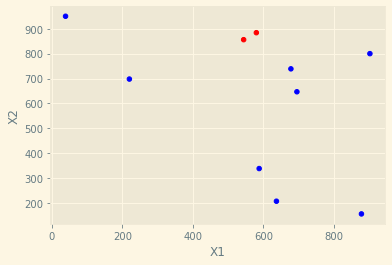

In [13]:
'''y = M[:,2]
col = np.where(y==1,'r','b')
plt.scatter(M[:,0], M[:,1], c=col)
plt.show()'''
col = df.Y.map({0:'b', 1:'r'})
df.plot.scatter(x='X1', y='X2', c=col)
plt.show()

### <font color='gold'>5. a. For two columns X1, X2, find squared error : (x1 – x2)^2 </font>

In [14]:
Z = np.square((M[:,0]-M[:,1]))
print("squared error : (x1 – x2)^2 = \n", Z)

squared error : (x1 – x2)^2 = 
 [ 92416 228484  62001   3721 519841 829921  97344   2304  10404 184041]


#### <font color='gold'>b. Find sum of the squared error</font>

In [15]:
Zsum = np.sum(Z)
print("Sum of [squared error : (x1 – x2)^2] = ", Zsum)

Sum of [squared error : (x1 – x2)^2] =  2030477


### 6. Find euclidean distance between first two rows of matrix M. 
### Compare result with inbuilt function numpy.linalg.norm(a-b) where a is first row and b is second row.

In [16]:
ed = np.sqrt(np.sum(np.square(M[:,0] - M[:,1])))
print("Euclidean Distance = ", ed)

Euclidean Distance =  1424.9480692291913


In [17]:
print("Euclidean Distance = ", np.linalg.norm(M[:,0]-M[:,1]))

Euclidean Distance =  1424.9480692291913


### <font color='gold'> 7. Create a vector V with two random values. <br> Find the Euclidean distance between each row of M with V. <br> Store the distance in a vector and print </font>

In [18]:
V = rng.integers(1000, size=(2))
V

array([326, 745], dtype=int64)

In [19]:
eu_dist = np.linalg.norm(M[:, 0:2] - V, axis=1)

In [20]:
print("Euclidean Distance between single point and matrix M:\n", eu_dist)

Euclidean Distance between single point and matrix M:
 [289.54619666 115.95257651 483.19768211 352.05113265 806.50356478
 352.69533595 244.63237725 381.79182809 578.61990979 620.55620213]


### <font color='gold'>8. Manipulate matrix <br> Create a matrix A with 10 rows and 2 columns. <br> Add a new column to a matrix. (Use np.column_stack) <br> Add a new row to a matrix(Use np.vstack)

In [21]:
A = rng.integers(1000, size=(10, 2))
print(A)

[[814 662]
 [847  39]
 [ 51 901]
 [255 834]
 [ 73 937]
 [200 161]
 [961 212]
 [685 379]
 [930 536]
 [759 383]]


In [22]:
C = rng.integers(1000, size=10)
print(C)

[128 805 803 645 384 182 901  61  95 762]


In [23]:
A = np.column_stack((A, C))
print(A)

[[814 662 128]
 [847  39 805]
 [ 51 901 803]
 [255 834 645]
 [ 73 937 384]
 [200 161 182]
 [961 212 901]
 [685 379  61]
 [930 536  95]
 [759 383 762]]


In [24]:
R = rng.integers(1000, size=3)
print(R)

[237  66 356]


In [25]:
A = np.vstack((A, R))
print(A)

[[814 662 128]
 [847  39 805]
 [ 51 901 803]
 [255 834 645]
 [ 73 937 384]
 [200 161 182]
 [961 212 901]
 [685 379  61]
 [930 536  95]
 [759 383 762]
 [237  66 356]]


### <font color='gold'>9. Create a matrix M’ with two columns X1’, X2’ and populate with random values. <br> Find the Euclidean distance between each row of M’ with each row of M(excluding the last column Y) created in Q.2 <br> Store the distance in a matrix Dist with 3 columns. First column is the row id of M, second column is the row id of M’, and the third column is distance value
Compare result with following code <font>

In [26]:
from sklearn.metrics.pairwise import euclidean_distances

In [27]:
M_ = rng.integers(1000, size=(10, 2))
M_

array([[676, 788],
       [911, 486],
       [967, 322],
       [ 48, 530],
       [697, 707],
       [406, 160],
       [657, 268],
       [970, 413],
       [569, 531],
       [ 13, 853]], dtype=int64)

In [28]:
Dist = np.linalg.norm(M[:,0:2] - M_, axis=1)
Dist

array([135.76450199, 722.78973429, 379.38107491, 663.76275882,
       579.0172709 , 871.08495567, 598.75955107, 361.08309293,
       428.07709586, 897.44136299])

In [29]:
def ed(v1, v2):
    return np.linalg.norm(v1-v2)

In [30]:
M2 = M[:,0:2]
Dist = np.empty((0, 3))
for i in range(len(M_)):
    for j in range(len(M2)):
        d = ed(M_[i], M2[j])
        Dist = np.vstack((Dist,np.array([j, i, d])))


Dist = np.round(Dist, 4)

### <font color='gold'>10. Sort Dist matrix based on last column.</font>

In [31]:
Dist = Dist[Dist[:,2].argsort()]

In [32]:
print(Dist)

[[   3.        4.       37.2156]
 [   3.        0.       49.0408]
 [   7.        4.       60.0333]
 [   9.        6.       63.2456]
 [   2.        6.       99.0051]
 [   5.        9.      100.4241]
 [   0.        0.      135.7645]
 [   7.        0.      142.2744]
 [   6.        0.      148.4857]
 [   7.        8.      171.2659]
 [   4.        2.      187.4727]
 [   2.        8.      192.9378]
 [   0.        4.      212.1745]
 [   6.        4.      213.565 ]
 [   8.        4.      225.1089]
 [   8.        0.      226.3184]
 [   3.        8.      234.8297]
 [   9.        5.      235.9343]
 [   1.        3.      240.4329]
 [   4.        6.      247.3095]
 [   2.        5.      255.2744]
 [   1.        9.      258.6001]
 [   7.        1.      269.4012]
 [   4.        7.      272.0294]
 [   8.        1.      314.129 ]
 [   6.        8.      325.9601]
 [   9.        8.      330.0803]
 [   4.        1.      330.6509]
 [   3.        1.      343.9448]
 [   9.        2.      349.1361]
 [   0.   

### <font color='gold'>11. a. Get initial k rows from sorted matrix</font>

In [33]:
k = 10
M3 = Dist[:k]
print(M3)

[[  3.       4.      37.2156]
 [  3.       0.      49.0408]
 [  7.       4.      60.0333]
 [  9.       6.      63.2456]
 [  2.       6.      99.0051]
 [  5.       9.     100.4241]
 [  0.       0.     135.7645]
 [  7.       0.     142.2744]
 [  6.       0.     148.4857]
 [  7.       8.     171.2659]]


#### <font color='gold'> b. Get the rows corresponding to these k rows from M. </font>

In [34]:
M4 = np.empty((0, 3))
for rw in M3:
    M4 = np.vstack((M4,M[int(rw[0])]))

In [35]:
M4

array([[678., 739.,   0.],
       [678., 739.,   0.],
       [695., 647.,   0.],
       [637., 208.,   0.],
       [588., 339.,   0.],
       [ 39., 950.,   0.],
       [580., 884.,   1.],
       [695., 647.,   0.],
       [544., 856.,   1.],
       [695., 647.,   0.]])

### <font color='gold'> 12. Find the number of 1s and number of 0s in the rows of M matrix, corresponding to the k rows found in Q. 11. Print 1 if the number of 1s are more else print 0. </font>

In [36]:
if(list(M4[:,2]).count(1.0) > list(M4[:,2]).count(0.0)):
    print("1")
else:
    print("0")

0


## <font color='gold'> PART B: kNN implementation </font>

### <font color='gold'> a. Load diabetes dataset as done in Lab 1. </font>

In [37]:
path='diabetes.csv'
data=pd.read_csv(path)

### <font color='gold'> b. Peek at few rows as done in Lab 1 </font>

In [38]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### <font color='gold'> c. Split the dataset into 80% training and 20% testing using numpy slicing. </font>

In [39]:
X = data.iloc[:,:8]
y = data.iloc[:,-1:]

In [40]:
idx_80 = int(len(data) * 0.80)
X_train_1, X_test_1, y_train_1, y_test_1 = X[:idx_80], X[idx_80:], y[:idx_80], y[idx_80:]

In [41]:
X_train_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23
610,3,106,54,21,158,30.9,0.292,24
611,3,174,58,22,194,32.9,0.593,36
612,7,168,88,42,321,38.2,0.787,40


### <font color='gold'> d. Use inbuilt function to do splitting and interpret results </font>

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [43]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23
610,3,106,54,21,158,30.9,0.292,24
611,3,174,58,22,194,32.9,0.593,36
612,7,168,88,42,321,38.2,0.787,40


#### <font color='green'> Interpretation: Both normal array slicing and train_test_split produced <br> same results because of shuffle=False property used in train_test_split function </font>

### <font color='gold'> e. Normalize the training dataset using StandardScaler as done in Lab 1. <br> Is it required to Normalize the testing dataset (X_test) too? </font>

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

mnormalizer = preprocessing.Normalizer().fit(X_train)
X_train_norm = mnormalizer.transform(X_train) 
X_test_norm = mnormalizer.transform(X_test)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

In [45]:
X_train_norm

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.01101723, 0.63899907, 0.21299969, ..., 0.12082224, 0.00217774,
        0.1322067 ],
       [0.01845419, 0.44290059, 0.23199555, ..., 0.10070716, 0.00207478,
        0.10545252],
       [0.04244974, 0.74287042, 0.56599651, ..., 0.22993608, 0.00621181,
        0.18394887]])

In [46]:
X_train_std

array([[ 0.65761025,  0.84315964,  0.17747999, ...,  0.2145386 ,
         0.43322822,  1.42843026],
       [-0.83784417, -1.08478865, -0.12876651, ..., -0.66389037,
        -0.38675734, -0.18677449],
       [ 1.25579201,  1.91424203, -0.23084868, ..., -1.07800688,
         0.56692152, -0.10176371],
       ...,
       [-0.2396624 ,  1.63882084, -0.53709519, ...,  0.1266957 ,
         0.33221551,  0.23827939],
       [ 0.95670113,  1.45520672,  0.99413734, ...,  0.79179192,
         0.90858217,  0.5783225 ],
       [ 0.65761025, -0.47274157,  0.58580866, ...,  0.07649976,
         1.17893973, -0.61182837]])

### <font color='gold'> f. Invoke inbuilt kNN function. <br> Interpret the output obtained. </font>

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

In [48]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
      dtype=int64)

#### <font color='green'> Interpretation: y_pred contains predictions derived from X_test on basis of model KNeighborsClassifier trained with train dataset X_train </font>

### <font color='gold'> g. Evaluate kNN. <br> Explain the output obtained. </font>

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 21]
 [25 30]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        99
           1       0.59      0.55      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



#### <font color='green'> Interpretation: accuracy of the KNeighborsClassifier model for this dataset is 70%. Precision, recall and f1-score of predicting 0 is 0.76, 0.79 and 0.77 respectively. Precision, recall and f1-score of predicting 1 is 0.59, 0.55 and 0.57 respectively.

### <font color='gold'> h. Find the total number of correct predictions, Type 1 error(FP) and Type 2 error(FN) </font>

<AxesSubplot:>

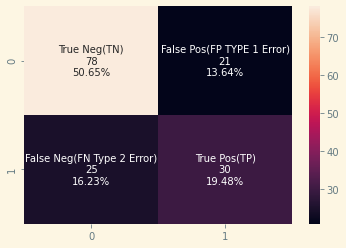

In [50]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg(TN)', 'False Pos(FP TYPE 1 Error)', 'False Neg(FN Type 2 Error)', 'True Pos(TP)']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt='')

### <font color='gold'> i. Plot the Type 1 and Type 2 error for different values of ‘k’ values.  <br> (X-axis : k value and Y-axis : Type 1 error as well as Type 2 error).</font>

In [51]:
def KNN(k, X_train, y_train):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train.values.ravel())
    y_pred = classifier.predict(X_test)
    return y_pred

In [52]:
y_pred_list = []
num_of_k = 30
for k in range(1, num_of_k):
    y_pred_list.append(KNN(k, X_train, y_train))

In [53]:
cf_matrix[0][1], cf_matrix[1][0]

(21, 25)

In [54]:
len(y_pred_list)

29

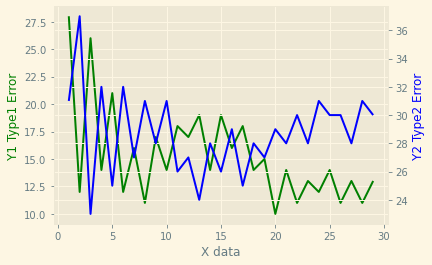

In [55]:
fig, ax1 = plt.subplots()
x = list(range(1, num_of_k))
y1 = []
y2 = []
for k in range(0, num_of_k-1):
    cf_matrix = metrics.confusion_matrix(y_test, y_pred_list[k])
    y1.append(cf_matrix[0][1])
    y2.append(cf_matrix[1][0])
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 Type1 Error', color='g')
ax2.set_ylabel('Y2 Type2 Error', color='b')

plt.show()